# Phase Transition Final Project

Kawasaki Dynamics

- Ising model have fixed spins. Don't change during simulation, but allowed to move (as in swap places)
- Movement Rules
1) For particles, A and B, if spins are the same, do nothing
2) if spins A and B are different, then calculate current system energy (E) and system energy if places were swapped (E')
3) Calculate probabilities according to Boltzmann distributions, p and p' respectively
4) With probability, p'/ p + p', if it hits, then swap the particles. 


Goal is to decrease the energy for every step


Link: https://rf.mokslasplius.lt/kawasaki-ising-model/

JS link: https://github.com/physrisk/website-source/blob/main/uploads/models/physics-models/ising-model/kawasaki.js

# 
Farkas Paper Notes

Simulation Details

MxN lattice (M = 400; N = 80)
periodic in x-direction
non-periodic in y-direction
3 main states (active, inactive, and refractory), but it can be split into more states 

Total activation effect factors in local and global interactions



MovieWriter imagemagick unavailable; using Pillow instead.


Animation saved as MexicanWave.gif


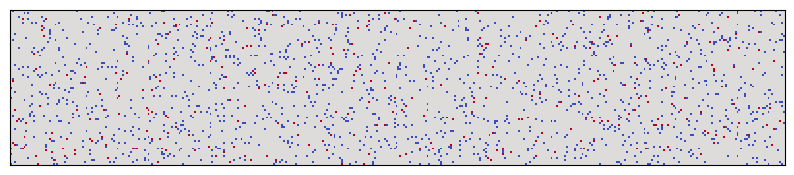

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#Parameters
GRID_SIZE = (80,400) #Rows, Columns
THRESHOLD = 3.0 #Activation threshold 
SPONTANEOUS_PROB = 0.01
REFRACTORY_PERIOD = 5  
CUTOFF_RADIUS = 2  
MAX_ITERATIONS = 100  
SENSITIVITY = 0.1  

# Initialize grid: 0 (excitable), 1 (active), -1 (refractory)
lattice = np.zeros(GRID_SIZE, dtype=int)
refractory_counters = np.zeros(GRID_SIZE, dtype=int)  # Track refractory time

# Set a nucleation center in the middle of the lattice
'''center_x, center_y = ROWS // 2, COLUMNS // 2
lattice[:, center_y-1:center_y+1] = 1
'''

#Create a weight matrix for the Mexican wave as this describes neighbor influence
#In Farkas paper
def create_weight_matrix(radius):
    weight_matrix = np.zeros((2*radius+1, 2*radius+1))
    for i in range(-radius, radius + 1):
        for j in range(-radius, radius + 1):
            distance = np.sqrt(i**2 + j**2)
            if distance <= radius:
                weight_matrix[i + radius, j + radius] = np.exp(-distance)
    return weight_matrix    

weights = create_weight_matrix(CUTOFF_RADIUS)

def update_wave(lattice, refractory_counters):
    new_grid = np.copy(lattice)
    rows, cols, = lattice.shape

    for x in range(rows):
        for y in range(cols):
            if lattice[x, y] == 0:
                weighted_sum = 0
                for i in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                    for j in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                        nx = x + i
                        ny = (y + j) % cols #Periodic boundary conditions

                        if 0 <= nx < rows:
                            if lattice[nx, ny] == 1:
                                weighted_sum += weights[i + CUTOFF_RADIUS, j + CUTOFF_RADIUS]


                # Activation conditions
                if weighted_sum >= THRESHOLD or np.random.rand() < SPONTANEOUS_PROB:
                    new_grid[x,y] = 1 #Activate
            elif lattice[x, y] == 1:
                new_grid[x,y] = -1 #Refractory state
                refractory_counters[x, y] = REFRACTORY_PERIOD #Set refractory counter
            elif lattice[x,y] == -1:
                refractory_counters[x, y] -= 1
                if refractory_counters[x, y] <= 0:
                    new_grid[x, y] = 0

    return new_grid

# Simulate the Mexican wave
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(lattice, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks([])
plt.yticks([])


def animate(frame):
    global lattice, refractory_counters
    lattice = update_wave(lattice, refractory_counters)
    cax.set_data(lattice)
    return [cax]

ani = animation.FuncAnimation(fig, animate, frames=MAX_ITERATIONS, interval=200, blit=True)

ani.save('MexicanWave.gif', writer='imagemagick', fps=5)

print('Animation saved as MexicanWave.gif')





#plt.imshow(lattice, cmap='gray')
#plt.title('2D Lattice to Resemble Mexican Wave')
#plt.gcf().set_size_inches(12, 12)
#plt.show()



